In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(os.path.join("data", "mouse_drug_data.csv"))
clinical_df = pd.read_csv(os.path.join("data", "clinicaltrial_data.csv"))

# Combine the data into a single dataset
df = pd.merge(mouse_df, clinical_df, left_on = "Mouse ID", right_on = "Mouse ID")

# Display the data table for preview
df.head()


# as_index = False (sets a generic index to the groupby)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_df = df.groupby(["Drug", "Timepoint"]).mean()
# Convert to DataFrame
# Preview DataFrame
mean_df.head(10)

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174
          25                  39.939528          0.818182
          30                  38.769339          1.090909
          35                  37.816839          1.181818
          40                  36.958001          1.380952
          45                  36.236114          1.476190

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_df = df.groupby(["Drug", "Timepoint"]).sem().drop(columns = "Mouse ID")
# Convert to DataFrame

# Preview DataFrame
sem_df


Metastatic Sites  Tumor Volume (mm3)
Drug      Timepoint                                      
Capomulin 0                  0.000000            0.000000
          5                  0.074833            0.448593
          10                 0.125433            0.702684
          15                 0.132048            0.838617
          20                 0.161621            0.909731
...                               ...                 ...
Zoniferol 25                 0.236621            0.602513
          30                 0.248168            0.800043
          35                 0.285714            0.881426
          40                 0.299791            0.998515
          45                 0.286400            1.003576

[100 rows x 2 columns]

In [4]:
new_df = pd.DataFrame({
    "Capomulin": mean_df["Tumor Volume (mm3)"].loc["Capomulin"],
    "Ceftamin": mean_df["Tumor Volume (mm3)"].loc["Ceftamin"],
    "Infubinol": mean_df["Tumor Volume (mm3)"].loc["Infubinol"],
    "Ketapril": mean_df["Tumor Volume (mm3)"].loc["Ketapril"],
    "Naftisol": mean_df["Tumor Volume (mm3)"].loc["Naftisol"],
    "Placebo": mean_df["Tumor Volume (mm3)"].loc["Placebo"],
    "Propriva": mean_df["Tumor Volume (mm3)"].loc["Propriva"],
    "Ramicane": mean_df["Tumor Volume (mm3)"].loc["Ramicane"],
    "Stelasyn": mean_df["Tumor Volume (mm3)"].loc["Stelasyn"],
    "Zoniferol": mean_df["Tumor Volume (mm3)"].loc["Zoniferol"],
})
new_df

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
new_df = new_df.reset_index()

In [6]:
sem_df["Tumor Volume (mm3)"].loc["Capomulin"]

Timepoint
0     0.000000
5     0.448593
10    0.702684
15    0.838617
20    0.909731
25    0.881642
30    0.934460
35    1.052241
40    1.223608
45    1.223977
Name: Tumor Volume (mm3), dtype: float64

In [7]:
sem_df.head()

Metastatic Sites  Tumor Volume (mm3)
Drug      Timepoint                                      
Capomulin 0                  0.000000            0.000000
          5                  0.074833            0.448593
          10                 0.125433            0.702684
          15                 0.132048            0.838617
          20                 0.161621            0.909731

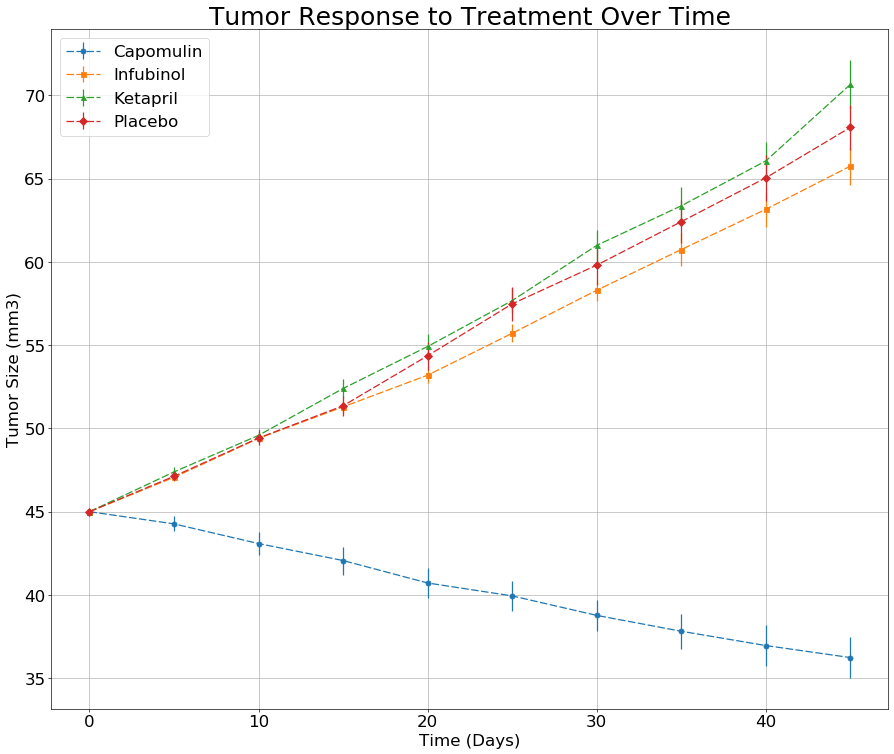

In [8]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (18, 15), dpi = 60)
plt.errorbar(new_df["Timepoint"], new_df["Capomulin"], yerr = sem_df["Tumor Volume (mm3)"].loc["Capomulin"], label = 'Capomulin', dashes = [6,2], marker = 'o')
plt.errorbar(new_df["Timepoint"], new_df["Infubinol"], yerr = sem_df["Tumor Volume (mm3)"].loc["Infubinol"], label = 'Infubinol', dashes = [6,2], marker = 's')
plt.errorbar(new_df["Timepoint"], new_df["Ketapril"], yerr = sem_df["Tumor Volume (mm3)"].loc["Ketapril"], label = 'Ketapril', dashes = [6,2], marker = '^')
plt.errorbar(new_df["Timepoint"], new_df["Placebo"], yerr = sem_df["Tumor Volume (mm3)"].loc["Placebo"], label = 'Placebo', dashes = [6,2], marker = 'D')
plt.title("Tumor Response to Treatment Over Time", size = '30')
plt.xlabel("Time (Days)", size = '20')
plt.legend(loc = "upper left", prop = {'size': 20})
plt.grid()
plt.ylabel("Tumor Size (mm3)", size = '20')
plt.xticks(size = '20')
plt.yticks(size = '20')


plt.savefig("tumor_response_chart")
# Save the Figure
plt.show()

## Metastatic Response to Treatment

In [9]:
new_ms_df = pd.DataFrame({
    "Capomulin": mean_df["Metastatic Sites"].loc["Capomulin"],
    "Ceftamin": mean_df["Metastatic Sites"].loc["Ceftamin"],
    "Infubinol": mean_df["Metastatic Sites"].loc["Infubinol"],
    "Ketapril": mean_df["Metastatic Sites"].loc["Ketapril"],
    "Naftisol": mean_df["Metastatic Sites"].loc["Naftisol"],
    "Placebo": mean_df["Metastatic Sites"].loc["Placebo"],
    "Propriva": mean_df["Metastatic Sites"].loc["Propriva"],
    "Ramicane": mean_df["Metastatic Sites"].loc["Ramicane"],
    "Stelasyn": mean_df["Metastatic Sites"].loc["Stelasyn"],
    "Zoniferol": mean_df["Metastatic Sites"].loc["Zoniferol"],
})
new_ms_df = new_ms_df.reset_index()
new_ms_df

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
5,25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
6,30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
7,35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
8,40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714
9,45,1.476190,2.692308,2.111111,3.363636,2.538462,3.272727,2.571429,1.250000,1.727273,3.071429


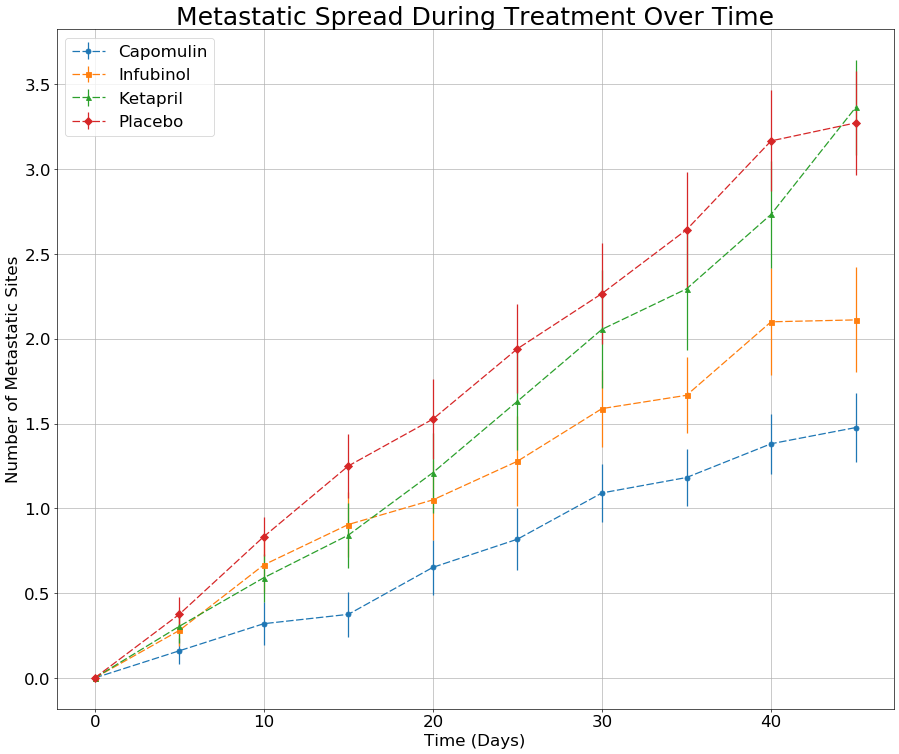

In [10]:
plt.figure(figsize = (18, 15), dpi = 60)
plt.errorbar(new_ms_df["Timepoint"], new_ms_df["Capomulin"], yerr = sem_df["Metastatic Sites"].loc["Capomulin"], label = 'Capomulin', dashes = [6,2], marker = 'o')
plt.errorbar(new_ms_df["Timepoint"], new_ms_df["Infubinol"], yerr = sem_df["Metastatic Sites"].loc["Infubinol"], label = 'Infubinol', dashes = [6,2], marker = 's')
plt.errorbar(new_ms_df["Timepoint"], new_ms_df["Ketapril"], yerr = sem_df["Metastatic Sites"].loc["Ketapril"], label = 'Ketapril', dashes = [6,2], marker = '^')
plt.errorbar(new_ms_df["Timepoint"], new_ms_df["Placebo"], yerr = sem_df["Metastatic Sites"].loc["Placebo"], label = 'Placebo', dashes = [6,2], marker = 'D')
plt.title("Metastatic Spread During Treatment Over Time", size = '30')
plt.xlabel("Time (Days)", size = '20')
plt.legend(loc = "upper left", prop = {'size': 20})
plt.grid()
plt.ylabel("Number of Metastatic Sites", size = '20')
plt.yticks(size = '20')
plt.xticks(size = '20')

plt.savefig("metastatic_spread_chart")
plt.show()

## Survival Rates

In [11]:
sr_df = df.groupby(["Drug", "Timepoint"]).count()
sr_df = sr_df.drop(['Tumor Volume (mm3)', 'Metastatic Sites'], axis = 1).rename(columns = {"Mouse ID": "Mouse Count"})

In [12]:
sr_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [13]:
new_sr_df = pd.DataFrame({
    "Capomulin": sr_df["Mouse Count"].loc["Capomulin"],
    "Ceftamin": sr_df["Mouse Count"].loc["Ceftamin"],
    "Infubinol": sr_df["Mouse Count"].loc["Infubinol"],
    "Ketapril": sr_df["Mouse Count"].loc["Ketapril"],
    "Naftisol": sr_df["Mouse Count"].loc["Naftisol"],
    "Placebo": sr_df["Mouse Count"].loc["Placebo"],
    "Propriva": sr_df["Mouse Count"].loc["Propriva"],
    "Ramicane": sr_df["Mouse Count"].loc["Ramicane"],
    "Stelasyn": sr_df["Mouse Count"].loc["Stelasyn"],
    "Zoniferol": sr_df["Mouse Count"].loc["Zoniferol"],
})
new_sr_df = new_sr_df.reset_index()

In [14]:
new_sr_df

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17
5,25,22,18,18,19,18,17,14,23,19,16
6,30,22,16,17,18,15,15,13,23,18,15
7,35,22,14,12,17,15,14,10,21,16,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


In [15]:
sr_percent_df = pd.DataFrame({
    "Capomulin": (sr_df["Mouse Count"].loc["Capomulin"] / float(new_sr_df["Capomulin"].loc[new_sr_df["Timepoint"] == 0])) * 100,
    "Infubinol": (sr_df["Mouse Count"].loc["Infubinol"] / float(new_sr_df["Infubinol"].loc[new_sr_df["Timepoint"] == 0])) * 100,
    "Ketapril": (sr_df["Mouse Count"].loc["Ketapril"] / float(new_sr_df["Ketapril"].loc[new_sr_df["Timepoint"] == 0])) * 100,
    "Placebo": (sr_df["Mouse Count"].loc["Placebo"] / float(new_sr_df["Placebo"].loc[new_sr_df["Timepoint"] == 0])) * 100
})
sr_percent_df = sr_percent_df.reset_index()

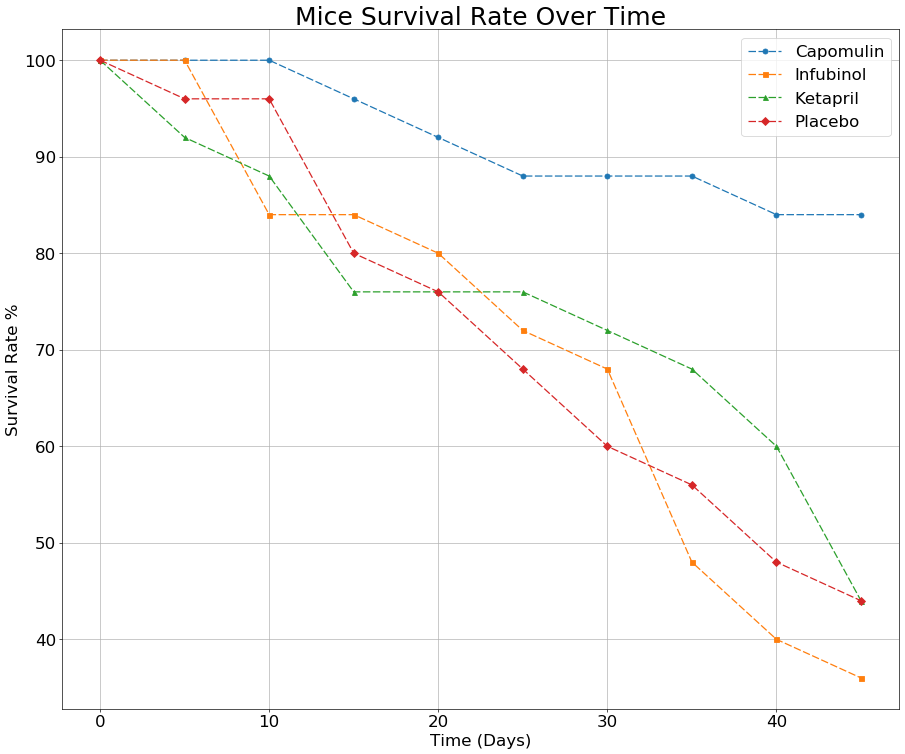

In [16]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize = (18, 15), dpi = 60)
plt.plot(sr_percent_df["Timepoint"], sr_percent_df["Capomulin"], label = "Capomulin", dashes = [6,2], marker = 'o')
plt.plot(sr_percent_df["Timepoint"], sr_percent_df["Infubinol"], label = "Infubinol", dashes = [6,2], marker = 's')
plt.plot(sr_percent_df["Timepoint"], sr_percent_df["Ketapril"], label = "Ketapril", dashes = [6,2], marker = '^')
plt.plot(sr_percent_df["Timepoint"], sr_percent_df["Placebo"], label = "Placebo", dashes = [6,2], marker = 'D')
plt.title("Mice Survival Rate Over Time", size = '30')
plt.ylabel("Survival Rate %", size = '20')
plt.xlabel("Time (Days)", size = '20')
plt.yticks(size = '20')
plt.xticks(size = '20')
plt.legend(prop = {'size': 20})
plt.grid()

# Save the Figure
plt.savefig("survival_rate_chart")
# Show the Figure
plt.show()

## Summary Bar Graph

In [17]:
mean_df1 = mean_df.reset_index()

In [18]:
mean_df1.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [19]:
drugs_list_array = df["Drug"].unique()
drugs_list = []
for i in drugs_list_array:
    drugs_list.append(i)
    
drugs_list.sort()

In [20]:
perc_change = []
for i in drugs_list:
    perc_change.append(((mean_df1["Tumor Volume (mm3)"].loc[mean_df1["Drug"] == i].iloc[-1] / mean_df1["Tumor Volume (mm3)"].loc[mean_df1["Drug"] == i].iloc[0]) - 1) * 100)

In [21]:
success_test = []
for i in perc_change:
    if i <0:
        success_test.append(True)
    else:
        success_test.append(False)

In [22]:
summary = list(zip(drugs_list, perc_change, success_test))

In [23]:
summary_df = pd.DataFrame(summary).rename(columns = {0: "Drugs", 1: "Percentage Change", 2: "Success Test"})
summary_df

,Drugs,Percentage Change,Success Test
0,Capomulin,-19.475303,True
1,Ceftamin,42.516492,False
2,Infubinol,46.123472,False
3,Ketapril,57.028795,False
4,Naftisol,53.923347,False
5,Placebo,51.297960,False
6,Propriva,47.241175,False
7,Ramicane,-22.320900,True
8,Stelasyn,52.085134,False
9,Zoniferol,46.579751,False


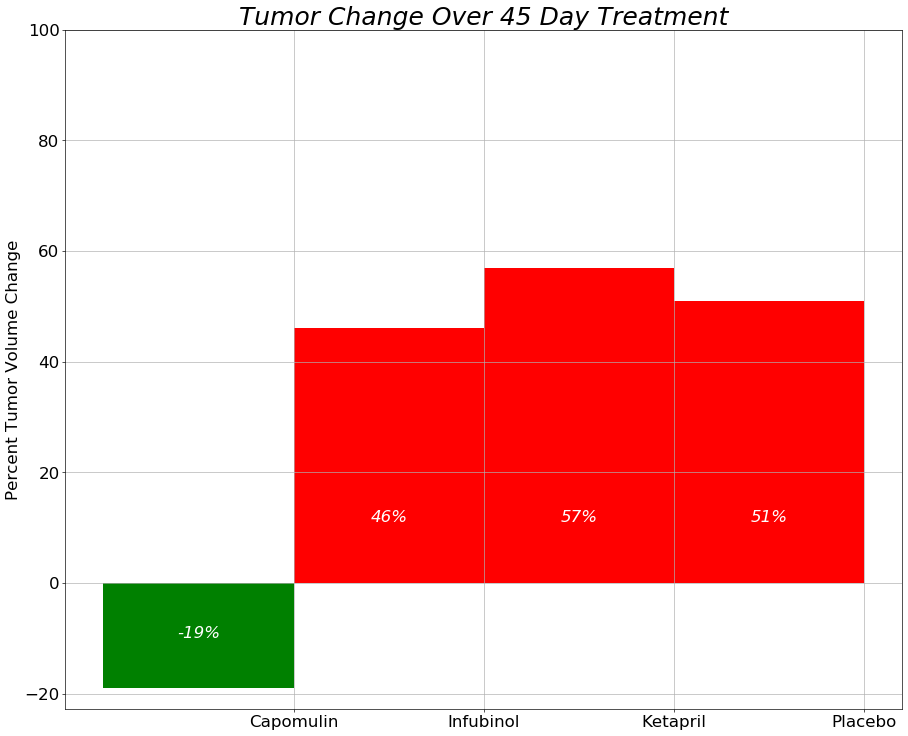

In [24]:
fig, ax = plt.subplots(figsize = (18, 15), dpi = 60)

summary_2_x = [summary_df["Drugs"].iloc[0], summary_df["Drugs"].iloc[2], summary_df["Drugs"].iloc[3], summary_df["Drugs"].iloc[5]]
summary_2_y = [int(summary_df["Percentage Change"].iloc[0]), int(summary_df["Percentage Change"].iloc[2]), int(summary_df["Percentage Change"].iloc[3]), int(summary_df["Percentage Change"].iloc[5])]

bar_plot = plt.bar(summary_2_x, summary_2_y, width = -1, align = "edge", color=summary_df["Success Test"].map({True: "green", False: "red"}))
ax.grid()
plt.yticks(np.arange(-20, 120, step = 20), size = '20')
plt.xticks(size = '20')
plt.ylabel("Percent Tumor Volume Change", size = '20')
plt.title("Tumor Change Over 45 Day Treatment", size = '30', fontstyle = 'oblique')


def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height() / abs(rect.get_height()) * 10
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                str(summary_2_y[idx]) + '%', size = '20', fontstyle = "oblique",
                ha='center', va='bottom', rotation=0, color = "white",)

autolabel(bar_plot)
plt.savefig("tumor_change_chart")
plt.show()

# Summary

## Observations

* In this study, Ketapril performed as bad if not worse than the placebo across all observations. I would recommend seeking further information on that front, as it may actually have a negative impact rather than a positive one on the mice with this type of growth. 
* In all tests Infubinol performed better than several others with the exception of having a very low survivability rate for the mice. I am sceptical that the survival rate for the mice with this drug is 100% tied to the tumor growth, and could possibly be associated to some other side effect of the medication. 
* Ramicane out performed Capomulin across the board again with the exception of the survival rate. One area this data is lacking is the cause of death, and if the cause of death in each case was the tumor growth or something else. If the cause of death is tied to a medication side effect, that could paint a very different picture than making the assumption that all deaths were caused by the tumor growth regarding mouse survival rates. 